In [110]:
import pandas as pd
df = pd.read_csv("DailyDelhiClimateTrain.csv")
df_test = pd.read_csv('DailyDelhiClimateTest.csv')
df["y_value"] = df["meantemp"].shift(-1)
df_test['y_value']=df_test['meantemp'].shift(-1)
df = df.iloc[:-1] #remove last row because there is not y_value
df_test = df_test.iloc[:-1]
print(df.shape)
df.head(7)

(1461, 6)


,date,meantemp,humidity,wind_speed,meanpressure,y_value
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,7.400000
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,7.166667
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,8.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,6.000000
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,7.000000
5,2013-01-06,7.000000,82.800000,1.480000,1018.000000,7.000000
6,2013-01-07,7.000000,78.600000,6.300000,1020.000000,8.857143


In [85]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure,y_value
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,25.506127,60.744851,6.806865,1011.101197,25.506127
std,7.339416,16.743928,4.559688,180.293335,7.339416
min,6.000000,13.428571,0.000000,-3.041667,6.000000
25%,18.857143,50.375000,3.475000,1001.571429,18.857143
50%,27.714286,62.625000,6.250000,1008.555556,27.714286
75%,31.312500,72.125000,9.250000,1014.937500,31.312500
max,38.714286,98.000000,42.220000,7679.333333,38.714286


Leído los datos del problemas, observamos las principales características a considerar. Por ejemplo, utilizamos una cantidad de 1461 datos, los cuales serán utilizados 1000 para **entrenamiento** y el resto para **validación**. Debido a que el índice temporal esta evaluado en días, lo anterior corresponde a poco más de 4 años de datos, lo cual no es malo. En primer lugar, viendo los estadísticos princiaples, estamos viendo un panorama mucho más general de la temperatura debido a que, justamente, estamos calculando la temperatura PROMEDIO que va a haber. 

El anterior describe en general nos sirve para estudiar si existen datos anómalos al comportamiento esperado. Por ejemplo estamos viendo que la temperatura promedio se comporta de manera normal, con un promedio de 25 grados, considerando todas las estacionesdel año. De hecho vemos que la  zona es bien calurosa debido a que el 50% de los datos está a 27° de temperatura. Pero lo que mejor nos hace ver el comportamiento de los datos es su gráfico, y es que son justamente una serie de tiempo.

En los 4 gráficos de abajo ploteamos las 4 características princiaples del problema. En el caso de la humedad y la temperatura es clara la estacionareidad de los datos, teniendo los mismos picks dependiendo la estación. Es es muy importante a considerar ya que al saber que una serie de tiempo es estacionaria, podemos sacarle provecho a la invarianza de su correlación, es decir, al *lag* de la variable aleatoria.

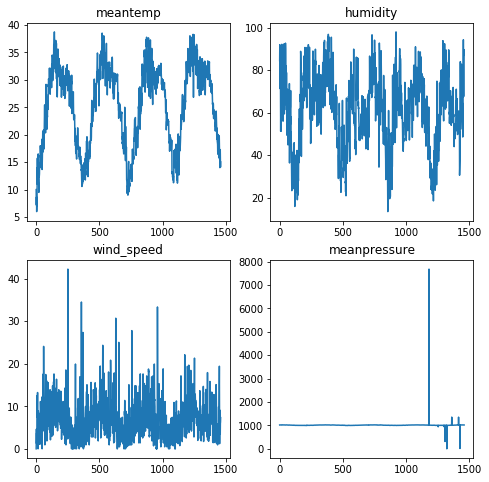

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,8))
cont = 0
for k in df.columns[1:5]:
  cont += 1
  plt.subplot(2,2,cont)
  plt.plot(df[k])
  plt.title(str(k))


In [0]:
...#procesamiento de fecha(datetime/timestamp) a numeros
df["date"] = pd.to_datetime(df["date"])
df['cday'] = df['date'].dt.dayofweek #0:lunes,6:domingo
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month #1:enero, 12: diciembre

df_test["date"] = pd.to_datetime(df_test["date"])
df_test['cday'] = df_test['date'].dt.dayofweek #0:lunes,6:domingo
df_test['year'] = df_test['date'].dt.year
df_test['month'] = df_test['date'].dt.month #1:enero, 12: diciembre
...#based on: https://en.wikipedia.org/wiki/Climate_of_India
seasons = ["winter","winter","summer","summer","summer","rainy","rainy","rainy","fall","fall","fall","winter"]
df['season'] = [ seasons[month_i - 1] for month_i in df['month'].values ]
df = pd.get_dummies(df,columns=['season']) #to one hot.. as nominal variable
... #any more information?
df.drop(["date"], axis=1, inplace=True) #delete date

df_test['season'] = [ seasons[month_i - 1] for month_i in df_test['month'].values ]
df_test = pd.get_dummies(df_test,columns=['season']) #to one hot.. as nominal variable
... #any more information?
df_test.drop(["date"], axis=1, inplace=True) #delete date
df_test['season_rainy'] = np.zeros((1,len(df_test))).T
df_test['season_fall'] = np.zeros((1,len(df_test))).T

A continuación se discretizarán algunas variables del problema para entregarle más información a la máquina y pueda identificar, por ejemplo, la estacionareidad del problema. Con ello nos referimos a que los pick que se vieron en cierto año, se repitan en los siguientes (como se puede ver en las imágenes anteriores). Es por eso que agregamos las variables del mes, si fue lluvioso, soleado, entre otras. 

Queremos ser enfáticos en que esto es muy importante para ayudar a nuestra máquina a entender la temporalidad de nuestros datos. Esto desde que es una serie de tiempo, podemos ver que claramente los datos dependen de datos pasados. 

In [81]:
df_test

,meantemp,humidity,wind_speed,meanpressure,cday,year,month,season_summer,season_winter
0,15.913043,85.869565,2.743478,59.000000,6,2017,1,0,1
1,18.500000,77.222222,2.894444,1018.277778,0,2017,1,0,1
2,17.111111,81.888889,4.016667,1018.333333,1,2017,1,0,1
3,18.700000,70.050000,4.545000,1015.700000,2,2017,1,0,1
4,18.388889,74.944444,3.300000,1014.333333,3,2017,1,0,1
...,...,...,...,...,...,...,...,...,...
108,33.500000,24.125000,9.025000,1000.875000,2,2017,4,1,0
109,34.500000,27.500000,5.562500,998.625000,3,2017,4,1,0
110,34.250000,39.375000,6.962500,999.875000,4,2017,4,1,0
111,32.900000,40.900000,8.890000,1001.600000,5,2017,4,1,0


In [0]:
y = df.pop("y_value").values
X = df.values 
X_train = X[:1000]
y_train = y[:1000]
X_val = X[1000:]
y_val = y[1000:]

y_test = df_test.pop('y_value').values
X_test = df_test.values
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=0) #shuffle values on train only

Ya con los datos de entrenamiento y validación en mano, comenzaremos a comparar con el modelo más "sencillo" y un árbol de decisión no regularizado  y regularizado.

In [27]:
#b) árbol no regularizado vs árbol regularizado

import numpy as np
def RMSE(ytrue,ypred):
    return np.sqrt(np.mean(np.square(ytrue - ypred)) )
from sklearn.tree import DecisionTreeRegressor as Tree
model_unr = Tree() #unregularized model -- default parameters
model_unr.fit(X_train,y_train)
print(model_unr.score(X_val,y_val))
... #define your regularized tree model

def tree_regul(X_train, y_train,X_val, y_val, depth,min_split, min_hojas):
  model = Tree(max_depth = depth, min_samples_split= min_split, min_samples_leaf=min_hojas)
  model.fit(X_train, y_train)
  train_score = model.score(X_train,y_train)
  val_score = model.score(X_val, y_val)
  return model,train_score,val_score

depth = np.arange(1,10)
min_sample_split = np.arange(2,13, 2)
min_sample_leaf = np.arange(1,10)


0.8800305117857565


In [28]:
almacenando = {}
for prof in depth:
  for split in min_sample_split:
    for hoja in min_sample_leaf:    
      modelo,train_sc, val_sc = tree_regul(X_train,y_train, X_val, y_val, prof, min_split = split, min_hojas = hoja)
      #print(val_sc, 'Profundidad = ', prof, '; Min_spli = ', split, '; min_hojas= ', hoja)
      almacenando[(prof,split,hoja)] = val_sc
maximo = max(almacenando.values())
print('El máximo valor es ', maximo, ' y se consigue en:')
for k in almacenando.keys():
  if almacenando[k] == maximo:
    print('Profundida = ', k[0], '; mínimo split= ', k[1], '; mínimo split hojas= ', k[2], '\n')

El máximo valor es  0.9419112087900231  y se consigue en:
Profundida =  4 ; mínimo split=  2 ; mínimo split hojas=  7 

Profundida =  4 ; mínimo split=  2 ; mínimo split hojas=  8 

Profundida =  4 ; mínimo split=  2 ; mínimo split hojas=  9 

Profundida =  4 ; mínimo split=  4 ; mínimo split hojas=  7 

Profundida =  4 ; mínimo split=  4 ; mínimo split hojas=  8 

Profundida =  4 ; mínimo split=  4 ; mínimo split hojas=  9 

Profundida =  4 ; mínimo split=  6 ; mínimo split hojas=  7 

Profundida =  4 ; mínimo split=  6 ; mínimo split hojas=  8 

Profundida =  4 ; mínimo split=  6 ; mínimo split hojas=  9 

Profundida =  4 ; mínimo split=  8 ; mínimo split hojas=  7 

Profundida =  4 ; mínimo split=  8 ; mínimo split hojas=  8 

Profundida =  4 ; mínimo split=  8 ; mínimo split hojas=  9 

Profundida =  4 ; mínimo split=  10 ; mínimo split hojas=  7 

Profundida =  4 ; mínimo split=  10 ; mínimo split hojas=  8 

Profundida =  4 ; mínimo split=  10 ; mínimo split hojas=  9 

Profundid

En lo anterior, podemos ver que el valor score del árbol no reuglarizado fue de 0.88 en los datos de validación, mientras que el del árbol regularizado, encontramos que su máximo score fue en 0.94, cuando su profunidad es de 4, su split mínimo es de 2 y su split mínimo en cada hoja es de 7 ( vemos que hay hartos puntos donde se alcanza el máximo pero elegimos el más sencillo)

Respondiendo al escalamiento de los datos, ello no es necesario debido a que el grado de los datos es similar y con el árbol de decisión estamos particionando nuestro universo, por lo tanto no queda afectado por esas pertubaciones que se puedan producir ( en este caso )

RMSE train=  0.0
RMSE val=  2.4540922066375885


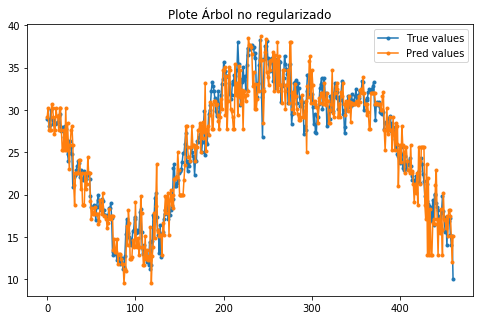

RMSE train=  1.662233031172956
RMSE val=  1.7076609322650647


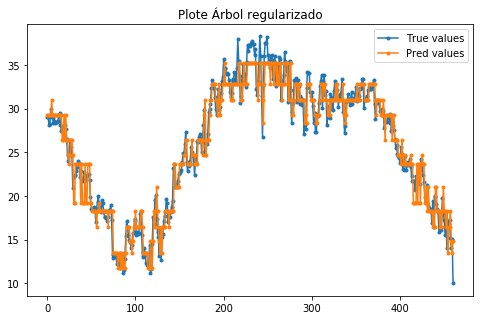

In [29]:
#C) Ploteo de RMSE

y_train_hat = model_unr.predict(X_train)
y_val_hat = model_unr.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_hat))
print("RMSE val= ",RMSE(y_val,y_val_hat))
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_hat, '.-' ,label="Pred values")
plt.legend()
plt.title('Plote Árbol no regularizado')
plt.show()

#########
#Desde que nuestro mejor modelo se conisguió en P=4, spl = 2, leaf = 7, utilizaremos ese árbol
model_rr = Tree(max_depth = 4, min_samples_split= 2, min_samples_leaf=7)
model_rr.fit(X_train, y_train)
y_train_reg = model_rr.predict(X_train)
y_val_reg = model_rr.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_reg))
print("RMSE val= ",RMSE(y_val,y_val_reg))
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_reg, '.-' ,label="Pred values")
plt.legend()
plt.title('Plote Árbol regularizado')
plt.show()



Notemos que el error de validación para el caso no regularizado es mucho mayor que para el caso regularizado. Es ya que tuvimos la ventaja de elegir la arquitectura que mejor nos acomode, por lo tanto era de esperarse. Ello nos hace ver que claramente nuestro árbol regularizado es mejor...no es nada sorprendible debido a que pudimos moldearlo de la mejor manera. Lo que sí hay que destacar es que la forma en que nuestr árbol regularizado predice los datos y es que en base a las imágenes anteriores, es mucho más suave que la imagen del árbol no regularizado.

Lo anterior sigue siendo por la ventaja de moldear el árbol como quisieramos.

Score del caso no regularizado =  0.9383387915422068
Score del caso Regularizado =  0.9512508322838131
El máximo score es:  0.9455350606084161  y se obtiene con una cantidad de estimadores igual a:  35


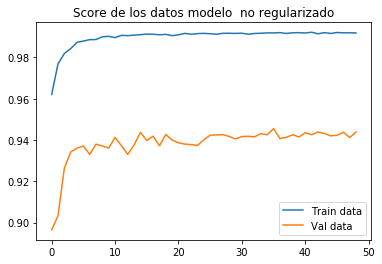

In [41]:
#d)

from sklearn.ensemble import BaggingRegressor
model_bagg_unr = BaggingRegressor(base_estimator=Tree(), n_estimators=10, n_jobs=-1) # no regularizado
model_bagg_unr.fit(X_train, y_train)


model_bagg_rr = BaggingRegressor(base_estimator=Tree(max_depth = 4, min_samples_split= 2, min_samples_leaf=7),
                                 n_estimators=10, n_jobs=-1) # regularizado
model_bagg_rr.fit(X_train,y_train)

print('Score del caso no regularizado = ',model_bagg_unr.score(X_val,y_val))
print('Score del caso Regularizado = ', model_bagg_rr.score(X_val,y_val))

#Variando estimadores caso no regularizado

def estimators_unr(X_train,y_train,X_val, y_val, n_estimators):
  model = BaggingRegressor(base_estimator=Tree(),
                                 n_estimators=n_estimators, n_jobs=-1)
  model.fit(X_train, y_train)
  train_sc = model.score(X_train,y_train)
  val_sc = model.score(X_val,y_val)
  return(model, train_sc,val_sc)

n_estimators = np.arange(1,50)
train_score_estimator_unr = []
val_score_estimator_unr = []
for estimator in n_estimators:
  modelo, sc_train, sc_val = estimators_unr(X_train,y_train, X_val, y_val, estimator)
  train_score_estimator_unr = train_score_estimator_unr + [sc_train]
  val_score_estimator_unr = val_score_estimator_unr + [sc_val]


plt.plot(train_score_estimator_unr, label = 'Train data')
plt.plot(val_score_estimator_unr, label = 'Val data')
plt.legend()
plt.title('Score de los datos modelo  no regularizado')

a = np.argwhere(val_score_estimator_unr==max(val_score_estimator_unr))[0][0]
print('El máximo score es: ', val_score_estimator_unr[a],' y se obtiene con una cantidad de estimadores igual a: ', 
      a)




Realizamos *Bagging* para ambos modelos, el regularizado y el no regularizado. Lo que debía esperarse era que el score del modelo mejorará ya que estamos calculando el promedio de distintos modelos haciendo boostraps a nuestro conjunto de entrenamiento. Y es justamente lo que sucedió. Tanto en el modelo no regularizado como el regularizado (utilizando los parámetros de la sección anterior), vemos como el score alcanza un 0.95 para el caso no regularizado, lo cual aumenta considerablemente el 0.88 anterior.

Vemos que la cantidad de estimadores para el modelo no regularizado supera los 30. Esto puede variar debido a que el shuffle que le hacemos a nuestro dataset es distinto cada vez que corremos el código.


Según la gráfica anterior no se observa tanto overfiting, si no que comienza a estabilizarse. Ello ya que estamos utilizando cada vez más estimadores y, por lo tanto, el error tiende a mantenerse.

El máximo score es:  0.9533007784834961  y se obtiene con una cantidad de estimadores igual a:  42


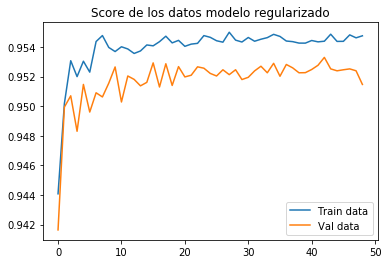

In [31]:
#Variando el número de estimadores

def estimators(X_train,y_train,X_val, y_val, n_estimators):
  model = BaggingRegressor(base_estimator=Tree(max_depth = 4, min_samples_split= 2, min_samples_leaf=7),
                                 n_estimators=n_estimators, n_jobs=-1)
  model.fit(X_train, y_train)
  train_sc = model.score(X_train,y_train)
  val_sc = model.score(X_val,y_val)
  return(model, train_sc,val_sc)

n_estimators = np.arange(1,50)
train_score_estimator = []
val_score_estimator = []
for estimator in n_estimators:
  modelo, sc_train, sc_val = estimators(X_train,y_train, X_val, y_val, estimator)
  train_score_estimator = train_score_estimator + [sc_train]
  val_score_estimator = val_score_estimator + [sc_val]


plt.plot(train_score_estimator, label = 'Train data')
plt.plot(val_score_estimator, label = 'Val data')
plt.legend()
plt.title('Score de los datos modelo regularizado')

b = np.argwhere(val_score_estimator==max(val_score_estimator))[0][0]
print('El máximo score es: ', val_score_estimator[b],' y se obtiene con una cantidad de estimadores igual a: ', 
      b)


Por otro lado, variamos los parámetros para el modelo regularizado, utilizando los parámetros encontrados en la sección C, y vemos que el modelo logra mejorar  pero no tan considerablemente y es que al momento de buscar los parámetros tuvimos que modificar al árbol a nuestra manera, minimizando el error lo más que se podía, por lo tanto el promedio de los estimadores oscila entre ese error YA MINIMIZADO.

RMSE train=  0.6739683929593088
RMSE val=  1.6969177251598881


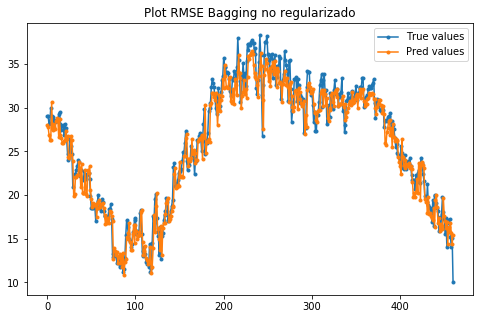

RMSE train=  1.5874389263364825
RMSE val=  1.5408463696844261


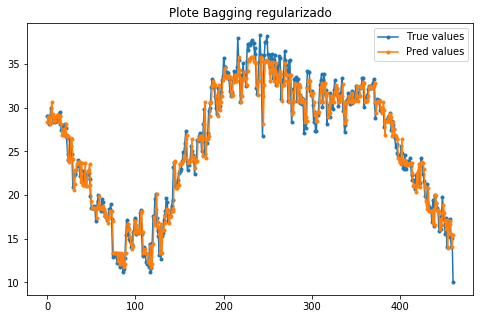

In [32]:
#Gráfica RMSE para bagging

model_unr_bag,dummy1,dummy2 = estimators_unr(X_train,y_train,X_val,y_val, a)
y_train_bag = model_unr_bag.predict(X_train)
y_val_bag = model_unr_bag.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_bag))
print("RMSE val= ",RMSE(y_val,y_val_bag))
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_bag, '.-' ,label="Pred values")
plt.legend()
plt.title('Plot RMSE Bagging no regularizado')
plt.show()




#Caso Regularizado

model_rr_bag, dummy3,dummy4 = estimators(X_train,y_train,X_val,y_val, b)
y_train_bag1 = model_rr_bag.predict(X_train)
y_val_bag1 = model_rr_bag.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_bag1))
print("RMSE val= ",RMSE(y_val,y_val_bag1))
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_bag1, '.-' ,label="Pred values")
plt.legend()
plt.title('Plote Bagging regularizado')
plt.show()



Estudiando el RMSE vemos que el caso no regularizado se vio mucho más beneficiado que el regularizado debido a que utilizamos los parámetros default, por lo tanto el *bagging* logra mejorar este comportamiento desde otra perspectiva simulando el caso regularizado. De hecho vemos que los errores de validación son similares.

In [33]:
#f) 
from sklearn.ensemble import AdaBoostRegressor
#model_unr = AdaBoostRegressor(base_estimator=Tree), n_estimators=50) #No regularizado

ada_est = np.arange(1,101)
def ada_estimator_unr(X_train,y_train, X_val, y_val, n):
  model_unr = AdaBoostRegressor(base_estimator=Tree(), n_estimators=n, loss= 'square')
  model_unr.fit(X_train,y_train)
  train_sc = model_unr.score(X_train,y_train)
  val_sc = model_unr.score(X_val,y_val)
  return(model_unr, train_sc,val_sc)

def ada_estimator_rr(X_train,y_train, X_val, y_val, n):
  model_rr = AdaBoostRegressor(base_estimator=Tree(max_depth = 4, min_samples_split= 2, min_samples_leaf=7),
                                n_estimators=n, loss= 'square')
  model_rr.fit(X_train,y_train)
  train_sc = model_rr.score(X_train,y_train)
  val_sc = model_rr.score(X_val,y_val)
  return(model_rr, train_sc, val_sc)

ada_unr_train = []
ada_unr_val = []
ada_rr_train = []
ada_rr_val = []
for n in ada_est:
  modelo, train,val = ada_estimator_unr(X_train,y_train,X_val,y_val, n)
  modelo1, train1, val1 = ada_estimator_rr(X_train,y_train,X_val, y_val , n)
  ada_unr_train = ada_unr_train + [train]
  ada_rr_train = ada_rr_train + [train1]
  ada_unr_val = ada_unr_val + [val]
  ada_rr_val = ada_rr_val + [val1]

print("El mejor valor para el caso no regularizado es : ", max(ada_unr_val), ' el cual se consigue con ', 
      np.argwhere(ada_unr_val==max(ada_unr_val))[0][0], ' estimadores\n')
print("El mejor valor para el caso no regularizado es : ", max(ada_rr_val), ' el cual se consigue con ', 
      np.argwhere(ada_rr_val==max(ada_rr_val))[0][0], ' estimadores')

El mejor valor para el caso no regularizado es :  0.942598925811601  el cual se consigue con  88  estimadores

El mejor valor para el caso no regularizado es :  0.9481189761283723  el cual se consigue con  5  estimadores


Text(0.5, 0, 'Estimador')

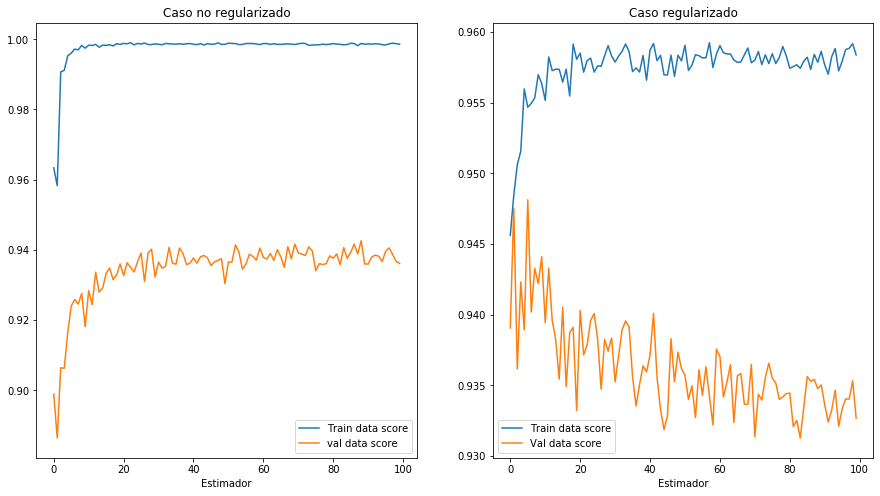

In [34]:
plt.figure(figsize = (15,8))

plt.subplot(1,2,1)
plt.plot(ada_unr_train, label = 'Train data score')
plt.plot(ada_unr_val, label = 'val data score')
plt.legend()
plt.title('Caso no regularizado')
plt.xlabel('Estimador')
####

plt.subplot(1,2,2)
plt.plot(ada_rr_train, label = 'Train data score')
plt.plot(ada_rr_val, label = 'Val data score')
plt.legend()
plt.title('Caso regularizado')
plt.xlabel('Estimador')

Adaboosting, para este caso, no esperabamos que obtuviera valos considerablemente mejores que *bagging* debido a que adaboosting agrega pesos DEPENDIENDO del error que se este dando. Por lo tanto, a la larga, en el caso no regularizado, no debería cambiar mucho, que es justamente lo que ya sucede. Por otro lado, el caso no regularizado se observa overfiting debido a que este árbol ya ha sido testeado de tal manera de minimizar el error de entrenamiento ( que es cuando añade los pesos al modelo) por lo tanto, al tener un desempeño mejor, lo que comienza a hacer es añadir pesos de tal manera que las repuestas del conjunto de entrenamiento comienzan a ser "memorizadas". Es por eso que se observa un overfiting mayor.

Por lo anterior es que para el caso regularizado se necesitan menos estimadores mientras que para el caso no regularizado se necesitan más.

RMSE train=  0.2735328314993235
RMSE val=  1.7873818451480465


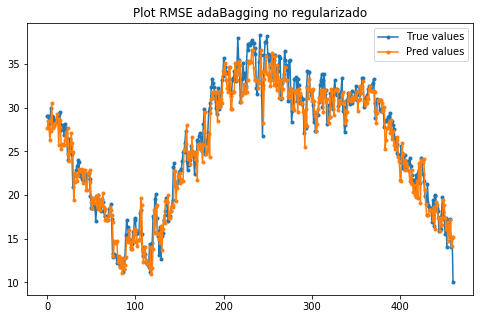

RMSE train=  1.593023030736699
RMSE val=  1.8320191811555615


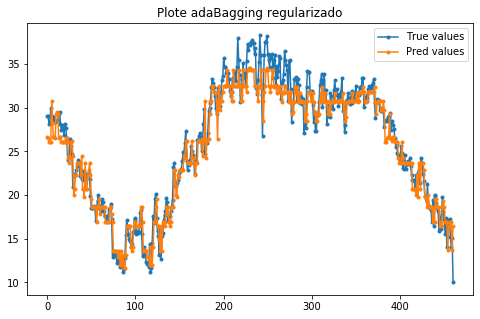

In [35]:
#RMSE ADABAG

model_unr_ada,dummy1,dummy2 = ada_estimator_unr(X_train,y_train,X_val,y_val,
                                                np.argwhere(ada_unr_val==max(ada_unr_val))[0][0])
y_train_ada = model_unr_ada.predict(X_train)
y_val_ada = model_unr_ada.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_ada))
print("RMSE val= ",RMSE(y_val,y_val_ada))
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_ada, '.-' ,label="Pred values")
plt.legend()
plt.title('Plot RMSE adaBagging no regularizado')
plt.show()




#Caso Regularizado

model_rr_ada, dummy3,dummy4 = ada_estimator_rr(X_train,y_train,X_val,y_val, 
                                         np.argwhere(ada_rr_val==max(ada_rr_val))[0][0])
y_train_ada1 = model_rr_ada.predict(X_train)
y_val_ada1 = model_rr_ada.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_ada1))
print("RMSE val= ",RMSE(y_val,y_val_ada1))
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_ada1, '.-' ,label="Pred values")
plt.legend()
plt.title('Plote adaBagging regularizado')
plt.show()


Por lo anterior, vimos que el modelo no regularizado fue el más beneficiado, logrando minimizar mejor el error que en el caso no regularizado. Claramente logra captar mejor el comportamiento de nuestra serie temporal (en comaración con lo hecho en la parte C) y simula muy bien lo del modelo no regularizado. Más aún, es posible ver que el error de validación es mucho mejor el del modelo no regularizado que el del regularizado.

score de validación caso no regularizado :  0.9440599454689002
Score de validación caso regularizado : 0.9449504365297737
El máximo score es  0.9533049460808408  y se obtiene con  15  estimadores
caso regularizado


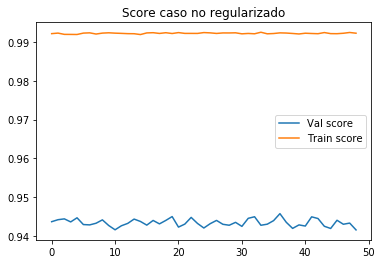

In [42]:
from sklearn.ensemble import RandomForestRegressor
model_rf_unr = RandomForestRegressor(n_jobs=-1)
model_rf_unr.fit(X_train,y_train)
print('score de validación caso no regularizado : ', model_rf_unr.score(X_val, y_val))

model_rf_rr = RandomForestRegressor(n_jobs=-1)
model_rf_rr.fit(X_train, y_train)
print('Score de validación caso regularizado :', model_rf_rr.score(X_val,y_val))
... #define your regularized random forest model

### Variando el número de estimadores
#Con el objetivo de ver si es posible mejorar los casos con los estimadores default.

error_rru_val = []
error_rru_train = []
for n in n_estimators:
  model_rf_unr = RandomForestRegressor(n_jobs = -1)
  model_rf_unr.fit(X_train,y_train)
  error_rru_val = error_rru_val + [model_rf_unr.score(X_val,y_val)]
  error_rru_train = error_rru_train + [model_rf_unr.score(X_train,y_train)]

plt.plot(error_rru_val, label = 'Val score')
plt.plot(error_rru_train, label = 'Train score')
plt.legend()
plt.title('Score caso no regularizado')

def random_rr(X_train,y_train, X_val,y_val, n):
  model_rrr = RandomForestRegressor(n_estimators = n, n_jobs=-1, max_depth=4, min_samples_leaf=7)
  model_rrr.fit(X_train,y_train)
  train_sc = model_rrr.score(X_train,y_train)
  val_sc = model_rrr.score(X_val, y_val)
  return(model_rrr,train_sc,val_sc)

error_rrr_val = []
error_rrr_train = []
n_estimators = np.arange(1,101)
for n in n_estimators:     
  model_rrr, train_rrr,val_rrr = random_rr(X_train, y_train, X_val, y_val, n)
  error_rrr_val = error_rrr_val + [val_rrr]
  error_rrr_train = error_rrr_train + [train_rrr]

print('El máximo score es ', max(error_rrr_val), ' y se obtiene con ', 
      np.argwhere(error_rrr_val == max(error_rrr_val))[0][0], ' estimadores')
print('caso regularizado')

        



Text(0.5, 1.0, 'Score data comparison')

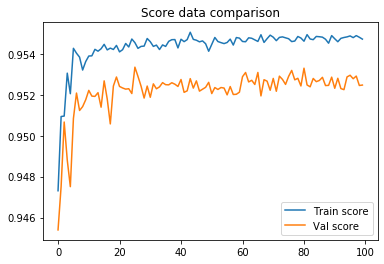

In [37]:
plt.plot(error_rrr_train, label = 'Train score')
plt.plot(error_rrr_val, label = 'Val score')
plt.legend()
plt.title('Score data comparison')

RMSE train=  0.6512034076070078
RMSE val=  1.689659897186429


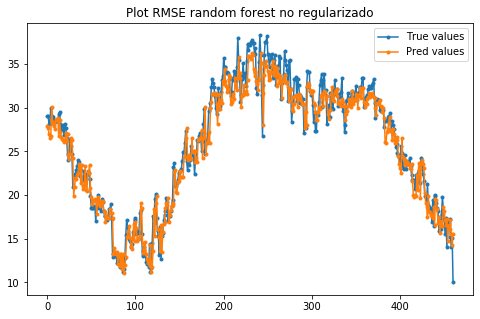

RMSE train=  1.5919950031304446
RMSE val=  1.5500114337670454


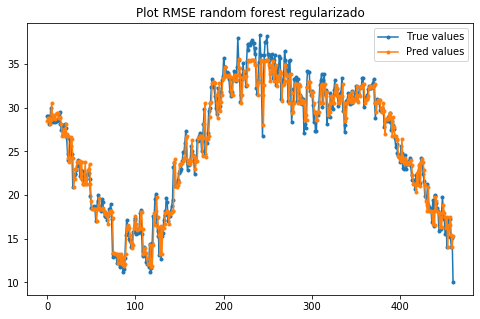

In [38]:

y_train_rr = model_rf_unr.predict(X_train)
y_val_rr = model_rf_unr.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_rr))
print("RMSE val= ",RMSE(y_val,y_val_rr))
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_rr, '.-' ,label="Pred values")
plt.legend()
plt.title('Plot RMSE random forest no regularizado')
plt.show()




#Caso Regularizado
model_rrr = RandomForestRegressor(n_estimators = np.argwhere(error_rrr_val == max(error_rrr_val))[0][0],
                             n_jobs=-1, max_depth=4, min_samples_leaf=7
                             , oob_score = True)
model_rrr.fit(X_train,y_train)
y_train_rrr = model_rrr.predict(X_train)
y_val_rrr = model_rrr.predict(X_val)
print("RMSE train= ",RMSE(y_train,y_train_rrr))
print("RMSE val= ",RMSE(y_val,y_val_rrr))
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_rrr, '.-' ,label="Pred values")
plt.legend()
plt.title('Plot RMSE random forest regularizado')
plt.show()


Sabemos que nuestro objetivo principal es disminuir la varianza del modelo. Por un lado, al elegir los parámetros del modelo regularizado, estamos ayudando a lo anterior. Por lo tanto, en randomforest, el cual combina de cierto modo los modelos anteriores debido a que particiona nuestro dataset y realiza un modelo para cada parte, es tal que la diferencia del RMSE y el score no debería ser tan alta...y es justamente lo que pasa. Podemos ver que el modelo alcanza un score del 0.94 y su RMSE para el caso de validación es 1.5.

Quien de verdad debería verse beneficiado es el modelo no regularizado y es efectivamente quien alcanza también un 0.94 de score. Esto ya que random forest saca el mayor potencial utilizando varios estimadores sobre el dataset que estamos, utilizando la media de ellos, para disminuir la varianza y , con ello, el error.

En general el modelo no regularizado siempre se va a ver favorecido debido a que su arquitectura es estándar, por lo tanto debe ser modificado por otros lados para mejorar su rendimiento, en estos caso, particionando el dataset, shuffleling, adaboost, etc. Pero en general vemos que el overfiting se controla bien y el RMSE igual.

In [39]:
#g)
oob_error = model_rrr.oob_score_
val_error = model_rrr.score(X_val,y_val)
print("OOB error: ",oob_error)
print ("Val error: ",val_error)

OOB error:  0.9450452114441557
Val error:  0.9521415248457598


Vemos que el error OOB del modelo random forest (el mejor elegido ) es tal que su error de validación  es muy similar a la métrica OOB, por lo tanto, puede servir como métrica de generalización.

In [0]:
#Utilizaremos Bagging para realizar la parte I

model1 = BaggingRegressor(base_estimator=Tree(max_depth = 4, min_samples_split= 2, min_samples_leaf=7),
                                 n_estimators=200, n_jobs=-1)
model1.fit(X_train,y_train)
list_estimators1 = model1.estimators_
list_predictions1 = [estimator.predict(X_val) for estimator in list_estimators1]

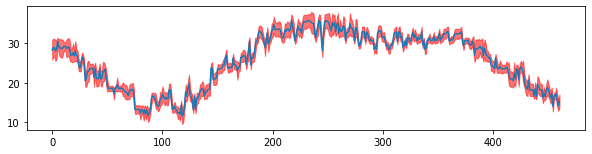

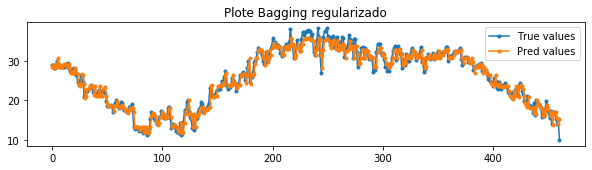

In [133]:
#I)

X_val_est = np.vstack(list_predictions1).T #has shape=(N_test, n_estimator), with n_estimator>100
from scipy.stats import norm
interv_val = []
for n in range(X_val.shape[0]):
    low, up = norm.interval(0.95, loc=np.mean(X_val_est[n]), scale=np.std(X_val_est[n]))
    interv_val.append([low,up])
interv_val = np.asarray(interv_val)
x = np.arange(X_val_est.shape[0])
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.plot(x, np.mean(X_val_est, axis=1))
plt.fill_between(x, interv_val[:,0], interv_val[:,1], color='r', alpha=.55)
plt.show()

plt.figure(figsize = (10,5))
plt.subplot(2,1,2)
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_bag1, '.-' ,label="Pred values")
plt.legend()
plt.title('Plote Bagging regularizado')
plt.show()


Impresionantemente en lo anterior, logramos ver que el intervalo de confianza no se dispara fuera de los rangos esperados. Y es que efectivamente estamos modelando lo visto en los RMSE anteriores pero esta vez contabilizando un margen de error que, justamente, está siendo graficado.

El de abajo son 50 estimadores, pero aún así se logra apreciar la buena forma con la que nuestra intervalo de confianza abarca todos los valores del conjunto de testeo.

In [118]:
#J) Evaluando los distintos modelos en el conjuntos de testeo.

print('Score árbol regresión no regularizado: ', model_unr.score(X_test,y_test))
print('Score árbol regresión regularizado: ', model_rr.score(X_test,y_test), '\n')

print('Score Bagging no regularizado  ', model_unr_bag.score(X_test,y_test))
print('Score bagging Regularizado : ', model_rr_bag.score(X_test,y_test),'\n')

print('Score Adaboosting no regularizado: ' ,model_unr_ada.score(X_test,y_test))
print('Score adaboosting Regularizado: ', model_rr_ada.score(X_test,y_test),'\n')

print('Score Randomforest no regularizado : ' ,model_rf_unr.score(X_test,y_test))
print('Score randomforest Regularizado : ', model_rrr.score(X_test,y_test), '\n')

Score árbol regresión no regularizado:  0.8600339823208535
Score árbol regresión regularizado:  0.9282067358726703 

Score Bagging no regularizado   0.9269973867245495
Score bagging Regularizado :  0.9298144307724828 

Score Adaboosting no regularizado:  0.9139158880909223
Score adaboosting Regularizado:  0.9260582839483897 

Score Randomforest no regularizado :  0.9277716565508741
Score randomforest Regularizado :  0.9303835968273625 



Comparando los valores de testeo con los de validación, vemos que randomforest para el modelo regularizado se lleva el premio mayor. En general todos están oscilando entre los mismo valores. En teoría yo me hubiera inclidamos más por el bagging regularizado debido a que el shuffle del muestro y la cantidad de estimadores me daban más confianza por la forma en que se elige el modelo. Pero podemos apreciar que los valores están bastante cerca, los de randomforest y bagging.